<a href="https://colab.research.google.com/github/KatePomazunova/GoIT_HW_DS/blob/main/hw10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score
import random

In [4]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)

num_classes = 10
num_features = np.product(x_train.shape[1:])
learning_rate = 0.001
batch_size = 512

steps_per_epoch = len(x_train) // batch_size
print("steps_per_epoch", steps_per_epoch)

dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Налаштування обробки тренувального набору даних
dataset_train = (dataset_train
                 .repeat()
                 .shuffle(1024)
                 .batch(batch_size)
                 .prefetch(tf.data.experimental.AUTOTUNE)
                 )

# Створення об'єкту Dataset для тестових даних
dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
steps_per_epoch 117


In [5]:
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, InputLayer
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint


model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [6]:
# Early stopping and learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
tf_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True, verbose=1)
tf_model = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
tf_tensorboard = TensorBoard(log_dir='./logs')

callbacks = [lr_scheduler, tf_stopping, tf_model, tf_tensorboard]

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(dataset_train,
                    epochs=20,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=dataset_test,
                    callbacks=callbacks
                    )

Epoch 1/20
117/117 [==============================] - ETA: 0s - loss: 1.8077 - accuracy: 0.7143
Epoch 1: val_accuracy improved from -inf to 0.83160, saving model to best_model.h5
117/117 [==============================] - 142s 1s/step - loss: 1.8077 - accuracy: 0.7143 - val_loss: 0.4712 - val_accuracy: 0.8316 - lr: 0.0010
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


117/117 [==============================] - ETA: 0s - loss: 0.3951 - accuracy: 0.8586
Epoch 2: val_accuracy improved from 0.83160 to 0.86170, saving model to best_model.h5
117/117 [==============================] - 141s 1s/step - loss: 0.3951 - accuracy: 0.8586 - val_loss: 0.3904 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 3/20
117/117 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.8784
Epoch 3: val_accuracy improved from 0.86170 to 0.87440, saving model to best_model.h5
117/117 [==============================] - 142s 1s/step - loss: 0.3363 - accuracy: 0.8784 - val_loss: 0.3602 - val_accuracy: 0.8744 - lr: 0.0010
Epoch 4/20
117/117 [==============================] - ETA: 0s - loss: 0.2968 - accuracy: 0.8925
Epoch 4: val_accuracy improved from 0.87440 to 0.87920, saving model to best_model.h5
117/117 [==============================] - 141s 1s/step - loss: 0.2968 - accuracy: 0.8925 - val_loss: 0.3513 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 5/20
117/117 [==========

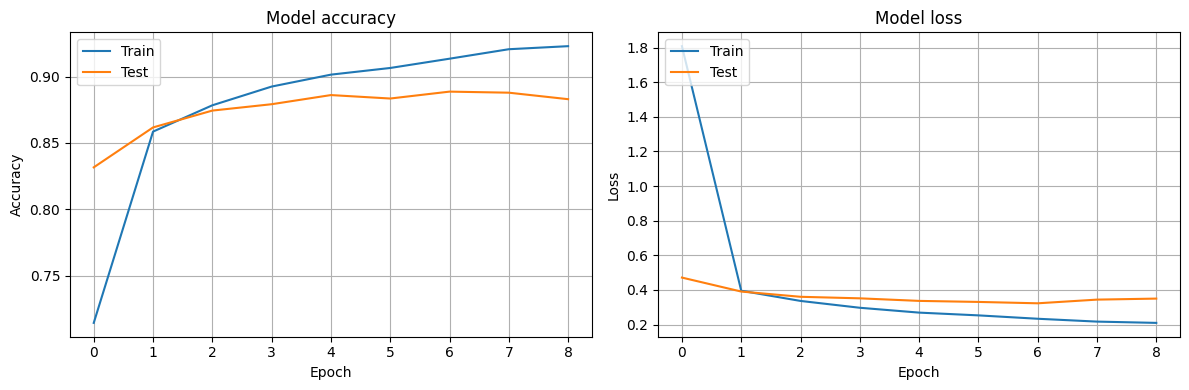

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

In [9]:
pred_test = model(x_test)
predicted_labels = tf.argmax(pred_test, axis=1).numpy()

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='macro')
recall = recall_score(y_test, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8887
Precision: 0.8901669627810224
Recall: 0.8886999999999998


HW9 - Accuracy: 0.8958
Precision: 0.8975485066565263
Recall: 0.8958

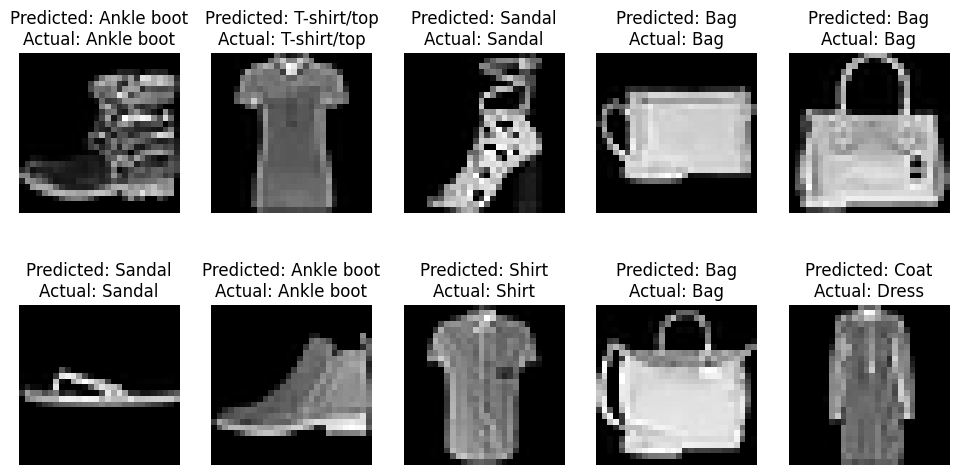

False 1 / 10.
Accuracy: 90.00%


In [13]:
rand_id = random.sample(range(len(x_test)), 10)
test_images = x_test[rand_id]
test_labels = y_test[rand_id]

predictions = model(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.title(f'Predicted: {class_names[predicted_labels[i]]}\nActual: {class_names[test_labels[i]]}')
    plt.axis('off')

plt.show()

false_pred= np.sum(predicted_labels != test_labels)
accuracy = 1.0 - (false_pred / 10.0)

print(f"False {false_pred} / 10.")
print(f"Accuracy: {accuracy * 100:.2f}%")